In [1]:
import pandas as pd
import pm4py 

parsing log, completed traces :: 100%|██████████| 56/56 [00:00<00:00, 2236.13it/s]


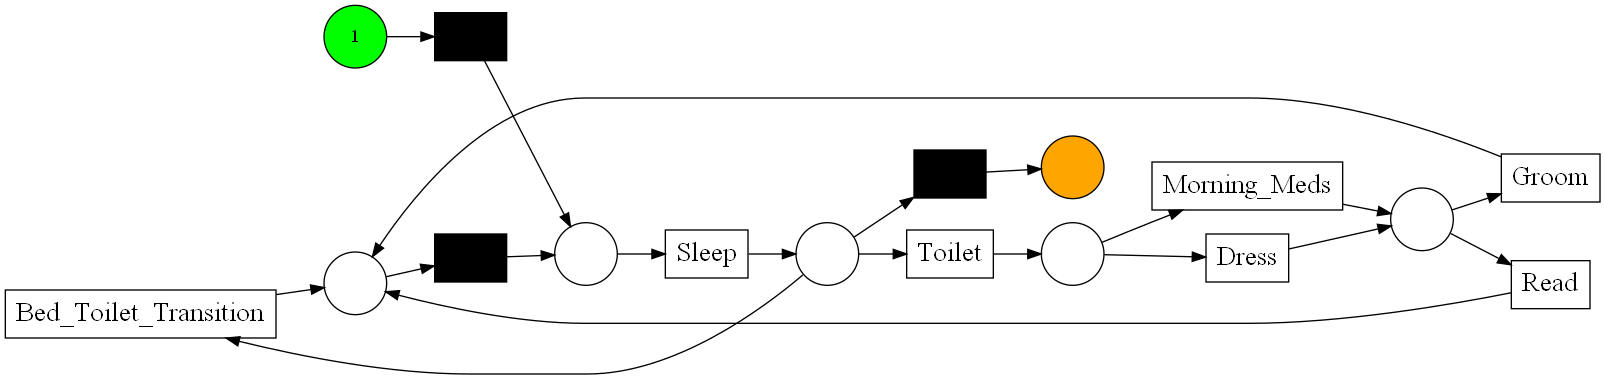

In [2]:
log = pm4py.read_xes("./all_filtered_v1.xes")
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(log)
pm4py.view_petri_net(net, initial_marking, final_marking)

In [3]:
from pm4py.algo.conformance.alignments import algorithm as alignments
from pm4py.algo.conformance.alignments import variants

In [4]:
align_result = alignments.apply(log, net, initial_marking, final_marking, variant=variants.state_equation_a_star)

In [6]:
for i in align_result:
    print(i["fitness"])

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [7]:
hh102 = pd.read_csv("hh102_activities_eventlog_v1.csv")

In [9]:
log[0][0]

{'sensor': 'M021', 'endtime': '2011-07-04 03:17:17', '@@index': 954, 'duration': '0 days 03:17:17', 'starttime': '2011-07-04 00:00:00', 'time:timestamp': datetime.datetime(2011, 7, 4, 0, 0, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'concept:name': 'Sleep'}

In [11]:
remain_index = []
for i in log:
    for j in i:
        remain_index.append(j["@@index"])

In [18]:
filtered_log = hh102.loc[remain_index]


In [19]:
filtered_log

,concept:name,starttime,sensor,endtime,Translate01,Translate02,duration,daycase,time:timestamp
954,Sleep,2011-07-04 00:00:00,M021,2011-07-04 03:17:17,NaN,NaN,0 days 03:17:17,2011-7-4,2011-07-04 00:00:00
955,Bed_Toilet_Transition,2011-07-04 03:17:41,MA013,2011-07-04 03:20:49,Bathroom,Bathroom,0 days 00:03:08,2011-7-4,2011-07-04 03:17:41
956,Sleep,2011-07-04 03:21:01,M021,2011-07-04 07:02:11,Bedroom,Bed,0 days 03:41:10,2011-7-4,2011-07-04 03:21:01
265,Sleep,2011-06-20 00:01:28,M021,2011-06-20 04:42:35,Bedroom,Bedroom,0 days 04:41:07,2011-6-20,2011-06-20 00:01:28
266,Bed_Toilet_Transition,2011-06-20 04:43:00,MA013,2011-06-20 04:47:06,Bathroom,Bathroom,0 days 00:04:06,2011-6-20,2011-06-20 04:43:00
...,...,...,...,...,...,...,...,...,...
106,Sleep,2011-06-17 04:39:15,M021,2011-06-17 08:22:40,Bedroom,Bed,0 days 03:43:25,2011-6-17,2011-06-17 04:39:15
107,Toilet,2011-06-17 08:23:06,MA013,2011-06-17 08:26:20,Bathroom,Bathroom,0 days 00:03:14,2011-6-17,2011-06-17 08:23:06
108,Morning_Meds,2011-06-17 08:27:21,MA013,2011-06-17 08:28:10,Bathroom,Bathroom,0 days 00:00:49,2011-6-17,2011-06-17 08:27:21
109,Read,2011-06-17 08:30:21,MA020,2011-06-17 09:52:42,Bedroom,Bed,0 days 01:22:21,2011-6-17,2011-06-17 08:30:21


In [32]:
filtered_log[filtered_log["daycase"]=="2011-6-20"]

,concept:name,starttime,sensor,endtime,Translate01,Translate02,duration,daycase,time:timestamp
265,Sleep,2011-06-20 00:01:28,M021,2011-06-20 04:42:35,Bedroom,Bedroom,0 days 04:41:07,2011-6-20,2011-06-20 00:01:28
266,Bed_Toilet_Transition,2011-06-20 04:43:00,MA013,2011-06-20 04:47:06,Bathroom,Bathroom,0 days 00:04:06,2011-6-20,2011-06-20 04:43:00
313,Sleep,2011-06-20 21:48:34,M021,2011-06-20 23:59:59,Bedroom,Bedroom,0 days 02:11:25,2011-6-20,2011-06-20 21:48:34


In [25]:
filtered_log.groupby("daycase").size()

daycase
2011-6-15    3
2011-6-16    1
2011-6-17    7
2011-6-18    5
2011-6-19    1
2011-6-20    3
2011-6-21    9
2011-6-22    3
2011-6-23    1
2011-6-24    5
2011-6-25    3
2011-6-26    1
2011-6-27    3
2011-6-28    5
2011-6-29    5
2011-6-30    7
2011-7-1     1
2011-7-10    3
2011-7-12    1
2011-7-13    3
2011-7-14    1
2011-7-15    5
2011-7-16    3
2011-7-17    3
2011-7-18    3
2011-7-19    5
2011-7-2     5
2011-7-20    3
2011-7-21    3
2011-7-22    3
2011-7-23    3
2011-7-24    3
2011-7-25    1
2011-7-26    3
2011-7-27    5
2011-7-28    1
2011-7-29    5
2011-7-3     3
2011-7-30    5
2011-7-31    3
2011-7-4     3
2011-7-5     5
2011-7-6     3
2011-7-7     5
2011-7-8     3
2011-7-9     1
2011-8-1     3
2011-8-13    1
2011-8-14    5
2011-8-15    5
2011-8-2     3
2011-8-3     3
2011-8-4     1
2011-8-5     3
2011-8-6     3
2011-8-7     3
dtype: int64

In [35]:
from pm4py.evaluation.precision import evaluator
prec = evaluator.apply(log, net, initial_marking, final_marking,)
prec

0.9272030651340997